> This assignment as two parts Section A and B. The first part is the implementation of function required in applying the CNN layers and the next section will be around the use of built in function of Tensorflow



`Before moving ahead as we have reached the stage of applying CNNs. We are going to deal with large number of parameters and hence more computational power. So you will need to connect runtime of collab to GPU: https://www.youtube.com/watch?v=-9CLfrZISRw`

### **BOTH THE SECTION CAN BE SOLVED INDEPENDENTLY** BUT SECTION A has **3X** more weightage than SECTION B doesn't have any code to write.

## **SECTION:A**

In [13]:
import numpy as np

### Q1: Complete the following function corr2d(X, K), which implements the cross correlation operation for matrix X and kernel K, both are two dimensional numpy arrays (height x width). The function should return a 2 dimensional numpy array which is the result of cross correlation operation between X and K. 

- not giving channels right now : assume channels = 1

In [14]:
def corr2d(X: np.array, K: np.array) -> np.array:

    # no padding for now and assume stride = 1

    X_ht, X_wth = X.shape
    K_ht, K_wth = K.shape

    Output_ht = X_ht - K_ht + 1
    Output_wth = X_wth - K_wth + 1

    Output_matrix = np.zeros((Output_ht, Output_wth))

    for i in range (Output_ht):
      for j in range (Output_wth):
        Output_matrix [i,j] = np.sum(X[i:i+K_ht, j:j+K_wth] * K)

    return Output_matrix    

    

In [15]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
K = np.array([[0.0, 1.0], [2.0, 3.0]], dtype=np.float32)
print(corr2d(X, K)) # example done in class, try to print this and check if you get the right answer

[[19. 25.]
 [37. 43.]]


### now try to make a new function corr2d_multiple_input_channels(X, K) : where each X and K have the same number of channels, both of them are now 3 dimensional numpy arrays, the output should be a 2 dimensional numpy array (output_h, output_w).

- hint : Use the above corr2d function and read about np.stack

In [16]:
def corr2d_multiple_input_channels(X: np.array, K: np.array) -> np.array: 
    # write a function for this task

    num_channels = X.shape[0]

    Output_h = X.shape[1] - K.shape[1] + 1
    Output_w = X.shape[2] - K.shape[2] + 1

    Resultant_matrix = np.zeros((Output_h, Output_w))
    X_new = np.stack(X, axis=0)
    K_new = np.stack(K, axis=0)
    for i in range (num_channels):
      Resultant_matrix += corr2d(X_new[i], K_new[i])

    return Resultant_matrix   


In [17]:
new_X = np.stack([X, X+1, X+2], axis=0) # stacking along a new dimension
new_K = np.stack([K, K+1, K+2], axis=0) 

print(f"new_X.shape = {new_X.shape}, new_K.shape = {new_K.shape}")
print(corr2d_multiple_input_channels(new_X, new_K))
# calculate the output by hand and then check whether you get the same answer
# answer should be a 2 dim np array : (output_height, output_width) 

new_X.shape = (3, 3, 3), new_K.shape = (3, 2, 2)
[[119. 149.]
 [209. 239.]]


### Write another function corr2d_mutli_in_out(X, K): where X (3 dim np array), K (4 dim numpy array), 0th dimension of K represents the number of kernel/filters we are using. Perform the cross correlation operation for K on X and return the output : 3 dim numpy array whose shape should be (num_output_channels, output_height, output_width)

- hint : use the above corr_2d_mutliple_input_channels(X, K) for each kernel in K and then stack them.

In [18]:
def corr2d_multi_in_out(X: np.array, K: np.array) -> np.array:
    # X -> (num_in_channels, n_h, n_w)
    # K -> (num_out_channels, num_in_channels, k_h, k_w)
    # output -> (num_out_channels, o_h, o_w)

    Output_channels = K.shape[0]
    Output_h = X.shape[1] - K.shape[2] + 1
    Output_w = X.shape[2] - K.shape[3] + 1
    
    Output = np.zeros((Output_channels, Output_h, Output_w))

    for i in range(Output_channels):
      Output[i] = corr2d_multiple_input_channels(X, K[i])

    return Output  

In [19]:
my_K = np.stack([new_K, new_K+1, new_K+2, new_K + 3], axis=0) 
print(f"my_K.shape = {my_K.shape}")

print(corr2d_multi_in_out(new_X, my_K)) # cross check the calculation

my_K.shape = (4, 3, 2, 2)
[[[119. 149.]
  [209. 239.]]

 [[155. 197.]
  [281. 323.]]

 [[191. 245.]
  [353. 407.]]

 [[227. 293.]
  [425. 491.]]]


### Q2: What is the computational and statistical benefits of stride larger than 1?? (not more than 20 word answer for each)

Computational benefits:
A larger stride reduces the number of operations and hence computational cost. Also decreases memory requirements.

Statistical benefits:
It reduces the spatial resolution so helps in reducing overfitting. By skipping certian input model exhibits a better generalization to variations.

### Q3: Now let's implement a model with just a single convolution layer, given X(input), Y(output) and K(kernel). Y is the output of the cross-correlation operation of K on X. You need to build a model to learn that kernel K.(try to print the kernel at each epoch)

- hint : conv_layer(output_channels = 1, input_channels = 1, kerenl_size=(1, 2), bias=False)

In [20]:
X = np.ones((6, 8), dtype=np.float32)
X[:, 2:6] = 0
print(X)

[[1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]]


In [21]:
K = np.array([[1.0, -1.0]], dtype=np.float32) # kernel, you need to learn this using a model
Y = corr2d(X, K) 
print(Y)

[[ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]]


In [22]:
X = X.reshape((1, 1, 6, 8)) # this will be the input to the model
Y = Y.reshape((1, 1, 6, 7)) # this is the output, to be used while calculation loss
lr = 3e-2 # use this learning rate

### Q4: Complete the following function max_pool2d(X, K) which performs maxpooling with kernel size K on X and returns and two dim numpy array

In [23]:
def max_pool2d(X: np.array, K: tuple) -> np.array:
    # write a function for this job

    X_height = X.shape[0]
    X_width = X.shape[1]

    K_height = K[0]
    K_width = K[1]

    Output_h = X_height // K_height
    Output_w = X_width // K_width

    pooled_matrix = np.zeros((Output_h, Output_w))

    for i in range (Output_h):
      for j in range (Output_w):
        initial_row = i * K_height
        initial_col = j * K_width
        final_row = initial_row + K_height
        final_col = initial_col + K_width

        pooled_matrix [i,j] = np.max(X[initial_row:final_row, initial_col:final_col])

    return pooled_matrix   


In [24]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
max_pool2d(X, (2, 2)) # check if the output matches with your calculation

array([[4.]])

# **SECTION:B**



### **JUST RUN THE CELLS AND VISUALIZE**( Nothing to code 🙂 )

> Indented block



In [25]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [26]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

170498071/170498071 [==============================] - 13s 0us/step


In [27]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(35000, 32, 32, 3)
(15000, 32, 32, 3)
(35000, 1)
(15000, 1)


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


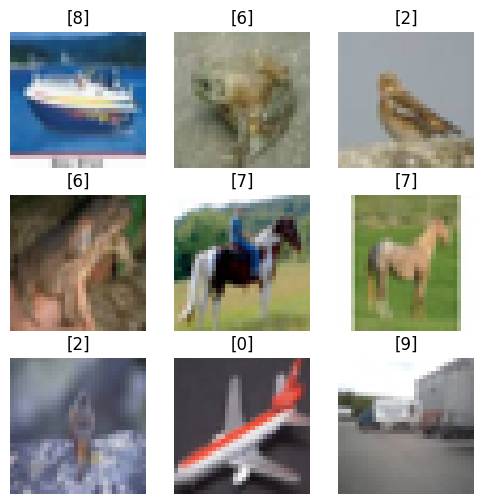

In [28]:
#Lets visualize the CIFAR-10 dataset

import random
figure = plt.figure(figsize=(6,6))

for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[index])
  plt.title(Y_train[index])
  plt.axis(False)

In [29]:
"""
So you can probably notice here that the images are 3D(coloured) but still 
not of great quality ( what can you expect from 32x32 image). Also there are
certain other factors which makes the classification a bit tougher than the 
cases of 2D( the digit and the fashion data) you dealt before. We will try to
understand the difficulties and find probable solution for them.
"""

'\nSo you can probably notice here that the images are 3D(coloured) but still \nnot of great quality ( what can you expect from 32x32 image). Also there are\ncertain other factors which makes the classification a bit tougher than the \ncases of 2D( the digit and the fashion data) you dealt before. We will try to\nunderstand the difficulties and find probable solution for them.\n'

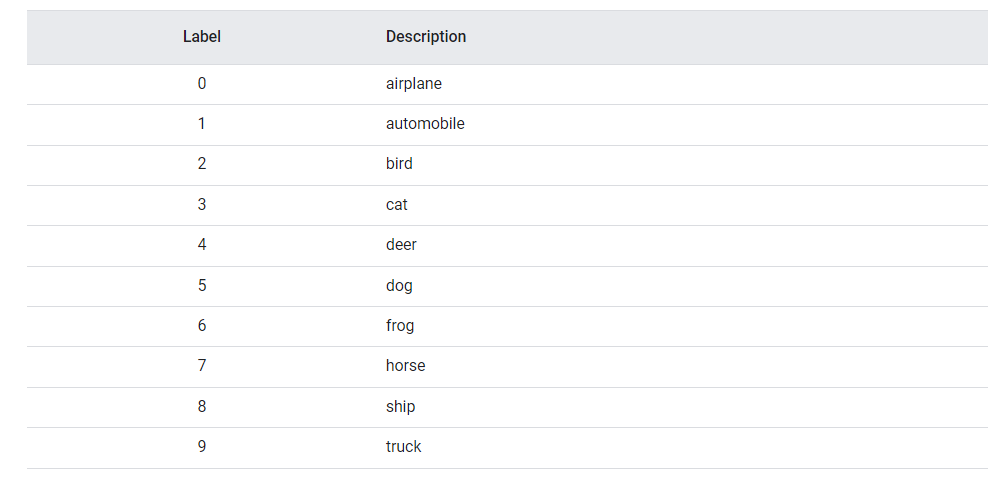

In [30]:
"""
Lets first start with the CNN model discussed in the class for digit
 classification. Notice that I have changed the input shape for this usecase.
 Earlier it was (28,28,1) for the digit dataset.
"""

'\nLets first start with the CNN model discussed in the class for digit\n classification. Notice that I have changed the input shape for this usecase.\n Earlier it was (28,28,1) for the digit dataset.\n'

In [31]:
# model initialization
cnn_model = tf.keras.Sequential()

# adding the 1st layer of CNN
cnn_model.add(tf.keras.layers.Conv2D(26, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#adding another CNN layer
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [32]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [33]:
"""
Explain what is Adam optimizer below in atleast 250 words.[ read on web and explain ]

Answer:
"""

'\nExplain what is Adam optimizer below in atleast 250 words.[ read on web and explain ]\n\nAnswer:\n'

Adam Optimizer:
Adam stands for Adaptive Moment Estimation. It is an optimization algorithm introduced by Kingma and Ba in their 2014 paper. It is an extension of the stochastic gradient descent(SGD) algorithm that updates the learning rate adaptively. It computes the adaptive learning rates for each parameter and stores the first and second moments of the gradients. So we have different learning rates for different parameters and hence more precise parameter updates. Unlike maintaining a single learning rate through training in SGD, it updates the lr for each network weight individually. The Adam Optimizer inherits the features of both Adagrad and RMS prop algorithms.The algorithm is straightforward to implement, has a faster running time, low memory requirements, and requires less tuning than any other optimization algorithm. The working of Adam optimizer can be summarized in the following steps:

1)Initialize the learning rate and the model weights.
2)Compute the gradients of the model with respect to the loss function using backpropagation.
3)Compute the moving average of the gradient and the squared gradient.
4)Compute the bias-corrected moving averages.
5)Update the model weights using the bias-corrected moving averages.


Adam Optimizer helps in quicker convergence and better generalization of the model. It differs from the SGD which used a fixed learning rate. It is efficient in many other ways like memory efficiency, handles noisy gradients and sidesteps local minima and saddle points.

Exam
Sites referred: https://www.askpython.com/python/examples/adam-optimizer.   https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-deep-learning-optimizers/

### **Make sure that you are connected to GPU runtime other wise the training in next cell is going to take a long time**

In [34]:
history = cnn_model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


875/875 [==============================] - 14s 4ms/step - loss: 2.5375 - accuracy: 0.1023 - val_loss: 2.3016 - val_accuracy: 0.0973
Epoch 2/10
875/875 [==============================] - 4s 4ms/step - loss: 2.2992 - accuracy: 0.1036 - val_loss: 2.3018 - val_accuracy: 0.1013
Epoch 3/10
875/875 [==============================] - 4s 4ms/step - loss: 2.2941 - accuracy: 0.1162 - val_loss: 2.3500 - val_accuracy: 0.1129
Epoch 4/10
875/875 [==============================] - 4s 4ms/step - loss: 2.2994 - accuracy: 0.1073 - val_loss: 2.2792 - val_accuracy: 0.1691
Epoch 5/10
875/875 [==============================] - 4s 4ms/step - loss: 2.2968 - accuracy: 0.1092 - val_loss: 2.3004 - val_accuracy: 0.1604
Epoch 6/10
875/875 [==============================] - 4s 4ms/step - loss: 2.2734 - accuracy: 0.1384 - val_loss: 2.3062 - val_accuracy: 0.0981
Epoch 7/10
875/875 [==============================] - 3s 4ms/step - loss: 2.1879 - accuracy: 0.1859 - val_loss: 1.9995 - val_accuracy: 0.2760
Epoch 8/10
875/8

In [35]:
""" 
Write about validation accuracy in 100 words.

Answer: 
"""

' \nWrite about validation accuracy in 100 words.\n\nAnswer: \n'

While making a model we need an extra tool to ensure whether our model is running as expected. In such cases, we use a dataset called Validation Dataset. This leads to improved performance of the model in a different way rather than increasing the accuracy of the model. It is simple that Validation accuracy corresponds to Validation dataset. Validation accuracy is simply the metric used to evaluate the accuracy of a model on unseen validation data. It measures how a model deals with the data it does not encountered during its training process. It is calculated by dividing the number of correctly predicted instances by the total number of instances in the validation set. The higher the validation accuracy,the better the model is at generalizing and making predictions on the new data. It is used in model selection, detecting overfitting, and describes the generalizing ability of the model.

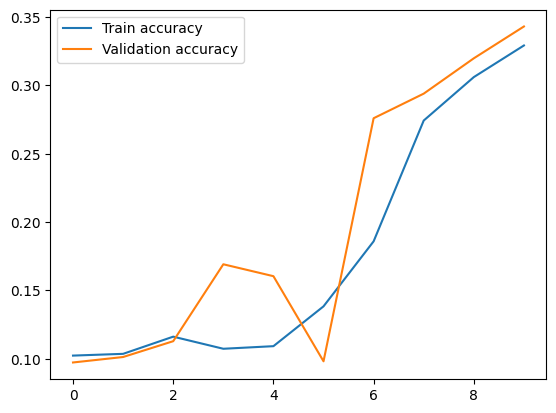

In [36]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [37]:
"""
What do you think is happening? Is the model training or not?
 You can see that both the training and validation accuracy are
 just roaming around 0.1. 
 One reason for this can be our model architecture. We had 26 filters
 in our first layer and 16 filters in our next layer. This funnel down approach
 works for dense layers but for Conv layers( which are good at feature extraction)
 we want them to extract more and more features.

 So lets change that to funne up --> 16 and 32 in the layers respectively
"""

'\nWhat do you think is happening? Is the model training or not?\n You can see that both the training and validation accuracy are\n just roaming around 0.1. \n One reason for this can be our model architecture. We had 26 filters\n in our first layer and 16 filters in our next layer. This funnel down approach\n works for dense layers but for Conv layers( which are good at feature extraction)\n we want them to extract more and more features.\n\n So lets change that to funne up --> 16 and 32 in the layers respectively\n'

In [38]:
# model initialization
cnn_model = tf.keras.Sequential()

"""adding the 1st layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

"""adding the 2nd layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(32, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [39]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [40]:
history = cnn_model.fit(X_train, Y_train, epochs=20, validation_split=0.2)

Epoch 1/20
875/875 [==============================] - 5s 4ms/step - loss: 2.5640 - accuracy: 0.1026 - val_loss: 2.3009 - val_accuracy: 0.1011
Epoch 2/20
875/875 [==============================] - 4s 5ms/step - loss: 2.2661 - accuracy: 0.1383 - val_loss: 2.1155 - val_accuracy: 0.2297
Epoch 3/20
875/875 [==============================] - 4s 4ms/step - loss: 1.9955 - accuracy: 0.2533 - val_loss: 1.8721 - val_accuracy: 0.2814
Epoch 4/20
875/875 [==============================] - 3s 4ms/step - loss: 1.7919 - accuracy: 0.3274 - val_loss: 1.7380 - val_accuracy: 0.3526
Epoch 5/20
875/875 [==============================] - 4s 5ms/step - loss: 1.6813 - accuracy: 0.3776 - val_loss: 1.6671 - val_accuracy: 0.3821
Epoch 6/20
875/875 [==============================] - 5s 5ms/step - loss: 1.6044 - accuracy: 0.4146 - val_loss: 1.5884 - val_accuracy: 0.4199
Epoch 7/20
875/875 [==============================] - 6s 7ms/step - loss: 1.5338 - accuracy: 0.4442 - val_loss: 1.5706 - val_accuracy: 0.4356
Epoch 

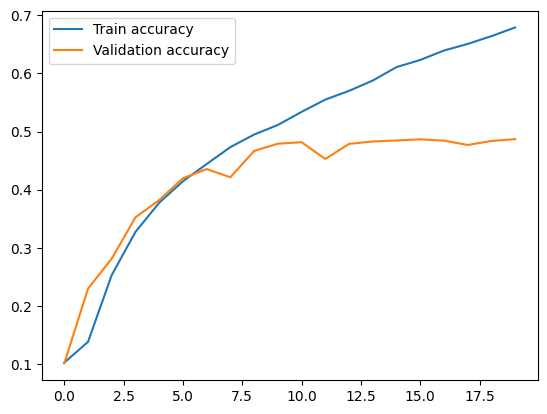

In [41]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [42]:
"""
Did our model improved??
Are we done with the job?
What is happening after 5( roughly ) epochs? Why is there a gap between
training and validation accuracy?

Our training accuracy reached to 0.73( and still increasing ) but 
the validation accuracy seems to stagnate at 0.52.

Is our model overfitting on the training data so much that it can't work well 
on unseen data.
"""

"\nDid our model improved??\nAre we done with the job?\nWhat is happening after 5( roughly ) epochs? Why is there a gap between\ntraining and validation accuracy?\n\nOur training accuracy reached to 0.73( and still increasing ) but \nthe validation accuracy seems to stagnate at 0.52.\n\nIs our model overfitting on the training data so much that it can't work well \non unseen data.\n"

In [43]:
"""
How are we gonna tackel this problem?
Well, we will see that in next part of this assignment.
Till then lets learn about about overfitting.
"""

'\nHow are we gonna tackel this problem?\nWell, we will see that in next part of this assignment.\nTill then lets learn about about overfitting.\n'

> **Well using Chatgpt to answer these question is something which everyone can think of right?? To create a difference write answer in your own terms after reading from web or reading the answer of Chatgpt.**
### **After all this is your midterm evaluation. Cheating is something we can catch easily** ( we have also done this )

In [44]:
"""
[CLARIFICATION]: Reading and understanding by searching on Chatgpt is not 
considered as cheating as long as you are writing that in your own word
( only problem is the crediblity of its information)

"""

'\n[CLARIFICATION]: Reading and understanding by searching on Chatgpt is not \nconsidered as cheating as long as you are writing that in your own word\n( only problem is the crediblity of its information)\n\n'

In [45]:
"""
Question: What is overfitting and underfitting below ( atleast 200 words )

Answer: 
"""

'\nQuestion: What is overfitting and underfitting below ( atleast 200 words )\n\nAnswer: \n'

Underfitting:
When your model to too simple for your data, for example when the data is cubic or quadratic and we end up making the model linear. It is also known as High Bias or Low Variance situation. To fix this we need to complicate the model. It has poor performance on training data and hence unreliable predictions. This problem can be tackled by increasing the number of features and hence making the model more complex.




Overfitting:
When your data is actually simple and the model created is way too complex for that data. In this case, data may be linear and we try to fit a cubic model for that data. It is also known as as High Variance or Low Bias situation. Here we need to simplify the model. Model performs really well on the training data but fails with test data. Also one of the reasons is data used may contain noise and is not cleaned.

Sites referred: https://towardsdatascience.com/overfitting-and-underfitting-principles-ea8964d9c45c#:~:text=Underfitting%20means%20that%20your%20model,val%2Ftest%20error%20is%20large.     https://www.simplilearn.com/tutorials/machine-learning-tutorial/overfitting-and-underfitting

In [46]:
"""
Question: What are regularization techniques in machine learning?(200 words)

Answer: 
"""

'\nQuestion: What are regularization techniques in machine learning?(200 words)\n\nAnswer: \n'

Regularization Techniques:
Technniques used for preventing overfitting the model. The problem arises when the model performs well on the training dataset but fails with unseen data, here certain techniques are used
where number of independent variables are reduced keeping the same number of variables resulting in increasing accuracy to a some extent. Our model becomes quite flexible. Slight modifications are made to the model such that the model generalizes better eventually increasing its performance on unseen data as well. It actually penalizes the coefficients or the weight matrices of the nodes. L1 and L2 are most common types of regularizations. Mathematically, Cost function = Loss(say, binary cross entropy) + Regularization term. This addtion of term ensures that the value of weight matrices decreases because it assumes tha tis neural network with smaller weight matrices leads to simpler models. Hence reduces overfitting. 


Sites referred: https://www.kaggle.com/code/sid321axn/regularization-techniques-in-deep-learning.    https://www.analyticsvidhya.com/blog/2021/05/complete-guide-to-regularization-techniques-in-machine-learning/

In [47]:
"""
Question: What dropout layer and what does it do?( read it from Tensorflow.org and write in 200 words)

Answer: 
"""

'\nQuestion: What dropout layer and what does it do?( read it from Tensorflow.org and write in 200 words)\n\nAnswer: \n'

In [48]:
"""
Question: What is L1 normalization? write its formulae as well( atleast 200 words )

Answer: 
"""

'\nQuestion: What is L1 normalization? write its formulae as well( atleast 200 words )\n\nAnswer: \n'

L1 normalization may be defined as the normalization technique that modifies the dataset values in a way that in each row the sum of the absolute values will always be up to 1. It is also called Least Absolute Deviations.L1 normalization ensures that the normalized vector has a sum of absolute values equal to 1, making it useful for various applications such as feature scaling, data preprocessing, and in some machine learning algorithms. This means that L1 normalization can promote the selection of a smaller subset of features, effectively performing feature selection and reducing the complexity of the model. When dealing with datasets that contain variables with different scales or units, normalizing the data can ensure that the variables are on a comparable scale. This can make it easier to interpret the data and make meaningful comparisons between variables.
Formula:
l1(vi)=|vi| / (∑|vj|)
In this formula |v(i)| represents the absolute value of the ith element of the vector v and the summation is performed from i=1 to i=n, here n is the length of the vector v.
Example:
v=[1,2,3]T The l1
-normalization simply mean, l1(v)=[1/6,2/6,3/6]T




Sites referred: https://stats.stackexchange.com/questions/502387/what-is-the-l1-normalization-of-some-data



In [49]:
"""
Question: What is L2 normalization? write its formulae as well( atleast 200 words )

Answer: 
"""

'\nQuestion: What is L2 normalization? write its formulae as well( atleast 200 words )\n\nAnswer: \n'

Also known as Euclidean normalization is a technique used to normalize vectors or matrices by dividing each element by the Euclidean norm or L2 norm of the vector. L2 norm is actually the square root of the sum of the squares of the element. It calculates the distance of the vector coordinate from the origin of the vector space. The result is positive distance value. Each element in the vector is divided by the L2 norm obtained as mentioned above. This ensures that the resulting vector has a length of 1, effectively normalizing the vector. Normalized vectors are easy to interpret and analyze. As we normalize each vector, the magnitude difference between features is reduced, this eventually results in stable and efficient optimization process.This techniques are often used to improve the performance and convergence of models.
Overall, L2 normalization is just one of many normalization techniques available. There are several benefits of using this technique including Scale invariance, outlier mitigation, increased interpretablity.

Sites referred: https://stats.stackexchange.com/questions/331926/explain-meaning-and-purpose-of-l2-normalization. 

In [50]:
"""
Question: What is data augmentation techniques and why is it needed in machine learning?( atleast 200 words )

Answer: 
"""

'\nQuestion: What is data augmentation techniques and why is it needed in machine learning?( atleast 200 words )\n\nAnswer: \n'

Data Augmentation is a technique where we increase the training set by modifying the existing dataset to create new copies. New data points are generated using deep learning by making some minor changes to the dataset. This technique is highly preferred since it needs a high operational cost to clean the raw dataset. This is applicable for a variety of data types like images, texts, and audio. A model that overfits will have very good performance on the training set but perform poorly on images that it hasn't seen before because it hasn't learned these general patterns. Data augmentation increases the number of examples in the training set while also introducing more variety in what the model sees and learns from. Both these aspects make it more difficult for the model to simply memorize mappings while also encouraging the model to learn general patterns. While it is possible to collect more real world data, this is much more expensive and time consuming than using data augmentation techniques.

Sites referred: https://www.datacamp.com/tutorial/complete-guide-data-augmentation.  https://www.calipsa.io/blog/what-is-data-augmentation-in-deep-learning